In [1]:
import os
import random
import csv

import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "/workspace/AAA740/Dataset"
CHECKPOINT_PATH = "/workspace/AAA740/Batch4"
SAVE_PATH = "./results_image"

MODEL_NAME = CHECKPOINT_PATH.split("/")[-1]

In [3]:
# Make Folder to Save Results
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
    print(f"The folder '{SAVE_PATH}' has been created.")
else:
    print(f"The folder '{SAVE_PATH}' already exists.")

The folder './results_image' already exists.


In [6]:
print(f"Loading Model '{MODEL_NAME}'...")
pipe = StableDiffusionPipeline.from_pretrained(f"{CHECKPOINT_PATH}", torch_dtype=torch.float16)

print("Upload Model to GPU...")
pipe = pipe.to("cuda")

# Load CSV file of test dataset
print("Loading Test Prompts...")
with open('../Dataset/test_dataset.csv', 'r') as file:
    csv_reader = csv.reader(file)
    test_csv = []
    for row in csv_reader:
        test_csv.append(row)

print("Preparation Done!")

Loading Model 'Batch4'...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Upload Model to GPU...
Loading Test Prompts...
Preparation Done!


In [7]:
# Randomly choose promt from test dataset
prompt_num = random.randint(0, len(test_csv) - 1)
prompt_line = test_csv[prompt_num]

prompt_id = prompt_line[0]
prompt_text = prompt_line[1]
prompt_file = prompt_line[2]

print(f"[{prompt_num}/{len(test_csv)}] {prompt_text} ({prompt_id})")

[55/301] The sample has a pseudostratified ciliated epithelium, which can sometimes be more cuboidal or columnar. (151558)


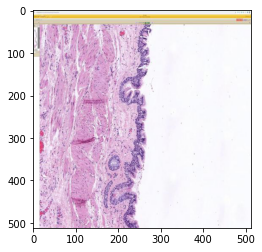

In [8]:
ori = plt.imread(f"{DATASET_PATH}/test/{prompt_file}")
plt.imshow(ori)

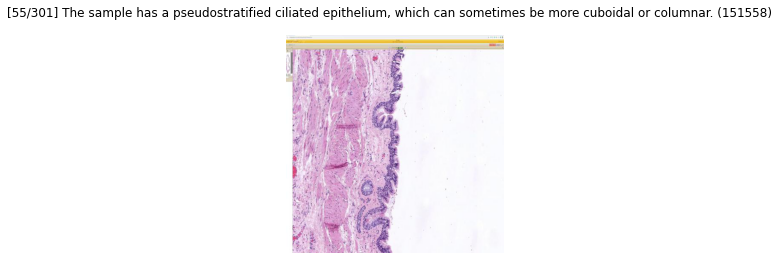

In [10]:
plt.suptitle(f"[{prompt_num}/{len(test_csv)}] {prompt_text} ({prompt_id})")

plt.figure(1, 2, 1)
ori = plt.imread(f"{DATASET_PATH}/test/{prompt_file}")
plt.imshow(ori)
plt.axis('off')

# plt.figure(1, 2, 2)
# image = pipe(prompt_text).images[0]
# plt.imshow(image)
# plt.axis('off')

plt.show()

# plt.savefig(f'./results_image/{MODEL_NAME}_{prompt_file.split(".")[0]}({prompt_id}).png', dpi=300)


# prompt = "Immunohistochemistry staining of AP-2 in paraffin embedded human skin using AP-2 Antibody at 4 ug/m"



In [14]:
image = pipe(prompt_text).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

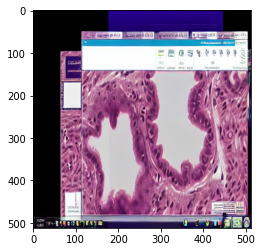

In [15]:
plt.imshow(image)